In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image, HTML
from tqdm import tqdm

# For data transformation and models
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split as split


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploring the data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/BDA EXAM/data_o.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

# Cleaning


## Features Selection
We will look into some of our features and decide whether or not we should include them in our models:

id: unique model for each track and will be dropped.<br><br>
name: 132,940 unique values. will be dropped.<br><br>
artists: there are 33,375 unique features. will not be dropped, but transformed.<br><br>
release_date \ year: release_date will be dropped, but year wont

In [4]:
columns = ['id', 'name', 'release_date', 'year']
for col in columns:
  print(f'{col:<15}: {df[col].nunique()} unique values') 

id             : 170653 unique values
name           : 133638 unique values
release_date   : 11244 unique values
year           : 100 unique values


In [5]:
df = df.drop(labels=['id', 'name', 'release_date'], axis=1)
df.shape

(170653, 16)

## Duplicates & Nulls

Befotr dropping any values there were not any duplicated in the data set:

After the removal, there are 628 duplicates.<br><br>

we will keep the first copy of the duplicated values.<br><br>

In [ ]:
df.duplicated().sum()

628

In [ ]:
df = df[~df.duplicated()==1]
df.shape

(170025, 16)

In [ ]:
df.isnull().sum().sum()

0

# Overview

In [7]:
num_columns = df.columns[df.dtypes != 'object']
str_columns = df.columns[df.dtypes == 'object']
print(f'There are {len(num_columns)} columns with numeric values & {len(str_columns)} columns with string')

There are 15 columns with numeric values & 1 columns with string


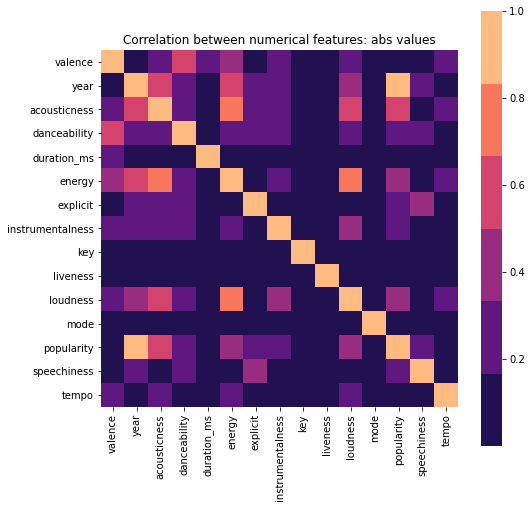

In [11]:
# Numeric Heatmap
numeric_df = pd.DataFrame(data=df, columns=num_columns, index=df.index)
corr = np.abs(numeric_df.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("magma")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numerical features: abs values')
plt.show()

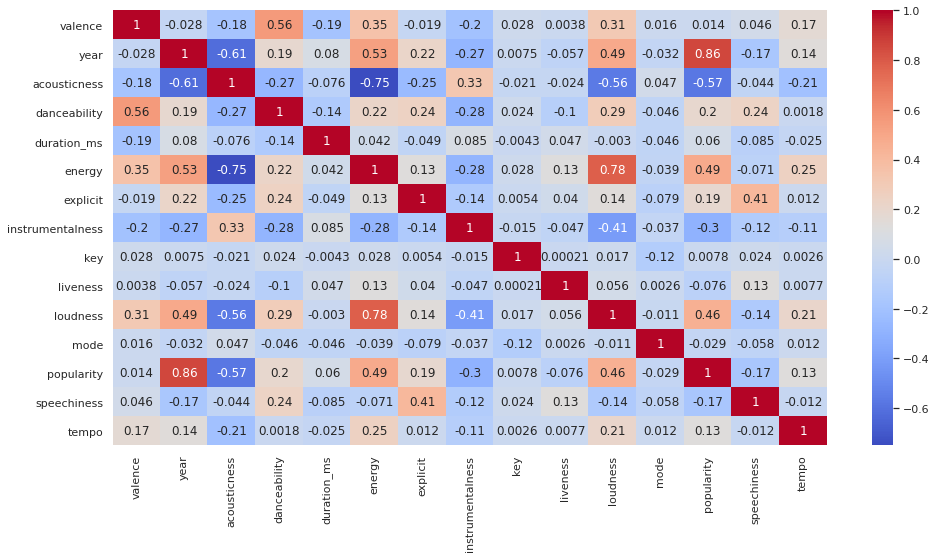

In [15]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [16]:
series = np.abs(corr['popularity']).sort_values(ascending=False)
print('highest correlation:')
for i, row in enumerate(series):
    if 0.1 <= row < 1:
      print(f'{series.index[i]:17} --> {row: .2f} (abs)')

highest correlation:
year              -->  0.86 (abs)
acousticness      -->  0.57 (abs)
energy            -->  0.49 (abs)
loudness          -->  0.46 (abs)
instrumentalness  -->  0.30 (abs)
danceability      -->  0.20 (abs)
explicit          -->  0.19 (abs)
speechiness       -->  0.17 (abs)
tempo             -->  0.13 (abs)


## Categorical Features

## Artists

In [19]:
df['artists'].nunique()

34088

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

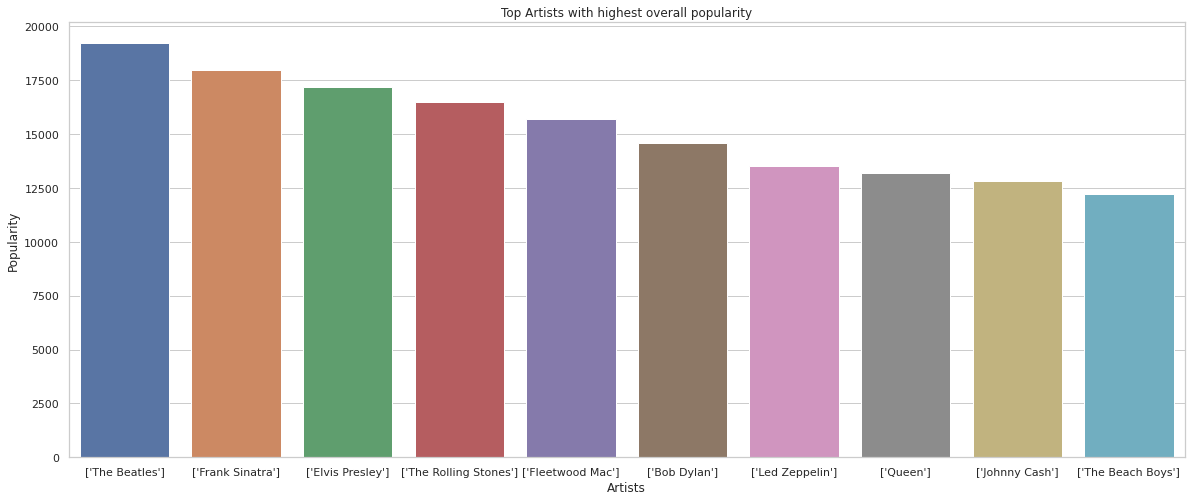

In [20]:
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
x = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with highest overall popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 0)

In [ ]:
df['popularity'].mean()

31.431794342906365

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

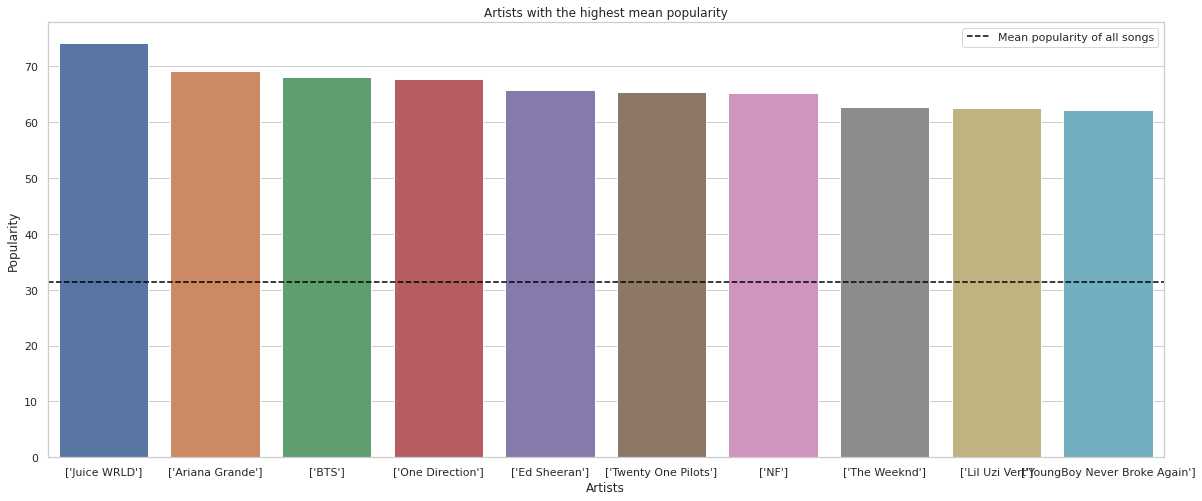

In [ ]:


df['popular_artist'] = df['artists'].map(df['artists'].value_counts()>50)
pop_arts  = df.groupby(['artists', 'popular_artist'])['popularity'].mean().sort_values(ascending=False).reset_index(1)
df_pop_arts = pop_arts.loc[pop_arts['popular_artist'] == True,['popularity']]

plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")

x = df_pop_arts.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
total_mean = ax.axhline(df['popularity'].mean(), ls='--', color='black', label = "Mean popularity of all songs")
ax.legend(handles=[total_mean])

ax.set_title('Artists with the highest mean popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


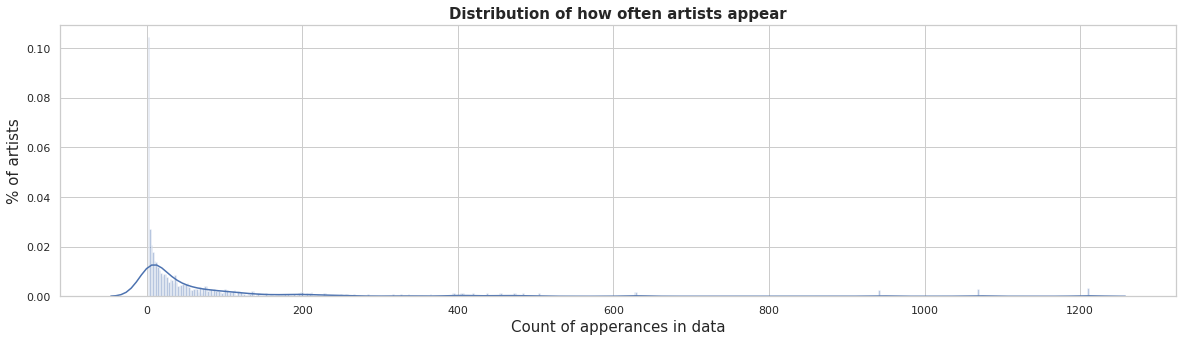

In [ ]:
# Adding Mean & Count values to each artist
df['mean'] = df.groupby('artists')['popularity'].transform('mean')
df['count'] = df.groupby('artists')['popularity'].transform('count')
# plotting
fig, ax = plt.subplots(figsize = (20, 5))
ax.set_title('Distribution of how often artists appear', weight='bold', fontsize = 15)
ax = sns.distplot(df['count'], bins = 600)
ax.set_xlabel('Count of apperances in data', fontsize=15)
ax.set_ylabel('% of artists', fontsize=15)
plt.show()

Lets zoom in to the left of the scale, to decide what is the cut-off for using artist mean OR overall data mean:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


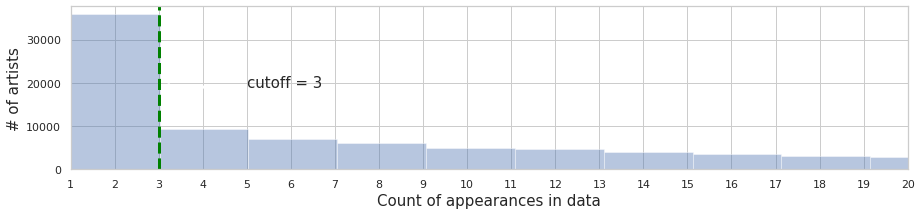

In [ ]:
fig, ax = plt.subplots(figsize = (15, 3))
ax = sns.distplot(df['count'], bins=600, kde=False)
ax.set_xlabel('Count of appearances in data', fontsize=15)
ax.set_ylabel('# of artists', fontsize=15)
ax.set_xlim(1,20)
ax.set_xticks(range(1,21,1))
ax.axvline(x=3, ymin=0, ymax=1, color='green', linestyle='dashed', linewidth=3)

ax.annotate("", xy=(3, 19000), xytext=(4.8, 19000), arrowprops=dict(arrowstyle="->", linewidth=3))
ax.text(x = 5, y = 19000, s='cutoff = 3', fontsize=15)

plt.show()

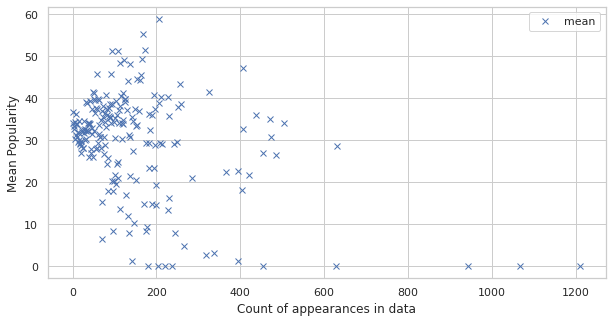

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
stat = df.groupby('count')['mean'].mean().to_frame().reset_index()
ax = stat.plot(x='count', y='mean', marker='x', linestyle = '', ax=ax)
ax.set_xlabel('Count of appearances in data', fontsize=12)
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.show()

In [ ]:
frequent_flyer = df[['artists','mean']].loc[df['count']>600].value_counts(ascending=False).reset_index()
frequent_flyer.columns=['Artist','Mean Popularity', '# of Tracks']
frequent_flyer

,Artist,Mean Popularity,# of Tracks
0,['Эрнест Хемингуэй'],0.066061,1211
1,['Эрих Мария Ремарк'],0.000000,1068
2,['Francisco Canaro'],0.059448,942
3,['Frank Sinatra'],28.550794,630
4,['Ignacio Corsini'],0.031847,628


## Year

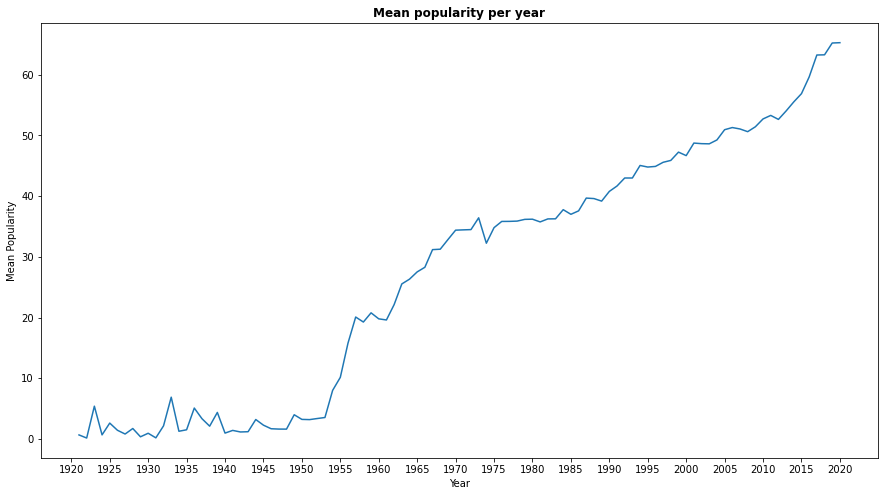

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = df.groupby('year')['popularity'].mean().plot()
ax.set_title('Mean popularity per year', weight='bold')
ax.set_ylabel('Mean Popularity')
ax.set_xlabel('Year')
ax.set_xticks(range(1920, 2021, 5))
plt.show()

## Key

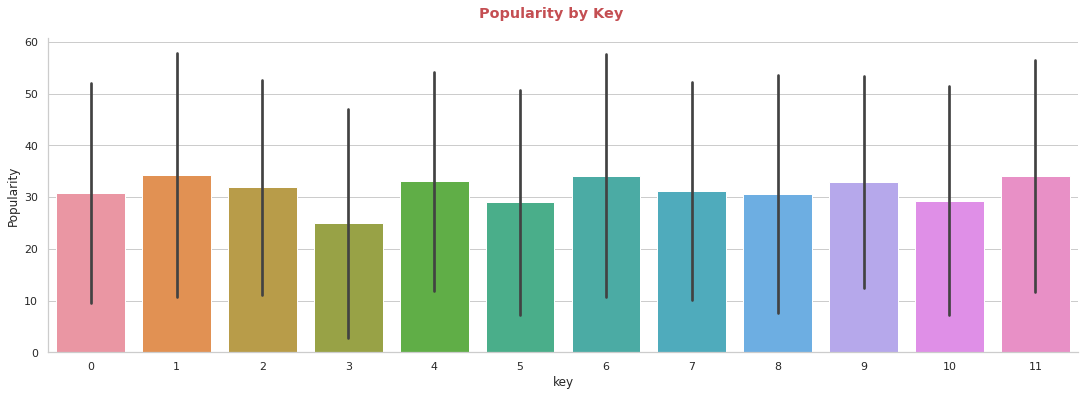

In [26]:
exp_data = sns.catplot(data=df, kind="bar",
                        x="key", y="popularity",
                        ci = 'sd',
                        height=5, aspect = 3)
exp_data.fig.suptitle('Popularity by Key', y=1.05, c='r', weight='bold')
exp_data.set_axis_labels("key", "Popularity")
plt.show()

In [27]:
np.nanmean(df[['key', 'popularity']])

18.31581923552472